In [1]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime

In [19]:
df = pd.read_excel('Data/Time Series Data.xlsx', index_col = 'Day')
df = df

In [20]:
# moving average strategy
# ma function

def rolling_averages_inflexions(data, window): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    gradients = pd.Series(np.gradient(SMA))
    
    # generating signals
    sigPriceBuy = []
    sigPriceSell = []
      
    #flag = 1: long position, flag = 0: short position, flag = -1: no position
    flag = -1
    
    flag_status = []
    
    daily_profit = []
    cumulative_profit = []
    daily_close_price = data[i]
    
    
    for i in range(len(data)):
        flag_status.append(flag)
        
        if i == len(data)-1:
            
            if flag == 1:
                
                #from long to no position
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = -1
                daily_profit.append(data[i])
                
            elif:
                #from short to nothing
                flag == 0:
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = -1
                daily_profit.append(data[i])
                
        elif gradients[i]>0 and gradients[i-1]<0:
            
            if flag != 1:
                #from nothing or short to long
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 1
                price_bought_at = data[i]
                
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
                
        elif gradients[i]<0 and gradients[i-1]>0:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell, flag_status)
    

In [141]:
def rolling_averages_inflexions(data, window): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    gradients_prov = np.gradient(SMA)
    gradients_prov = np.insert(gradients_prov,0,np.nan)
    gradients_prov = gradients_prov[:-1].copy()
    
    gradients = pd.Series(gradients_prov)

    # generating signals
    sigPriceBuy = []
    sigPriceSell = []
      
    #flag = 1: long position, flag = -1: short position, flag = 0: no position
    
    #initial position is nothing
    flag = 0
    
    flag_status = []
    daily_profit = []
    daily_close_price = data
    profit = 0

###########PROFIT OVERALL   
    for i in range(len(data)):
        
        #We buy/sell at the close of the next day hence begin the day with previous flag
        flag_status.append(flag)
        
        
        #if we reach the end of the dataframe either sell the long or buy the short at current price
        if i == len(data)-1:
            
            #if long go back to nothing
            if flag == 1:
                
                #from long to no position
                sigPriceBuy.append(0)
                sigPriceSell.append('SELL')
                
                flag = 0
                
                #daily_profit.append(data[i])
                profit += data[i] - price_bought_at
                
            #if short go back to nothing
            elif flag == -1 :
                
                sigPriceBuy.append('BUY')
                sigPriceSell.append(0)
                
                flag = 0
                
                #daily_profit.append(data[i])
                profit += price_short_at - data[i]
                
                
        #iterate through all the other days and find profit
        else:
            # TAKING A LONG POSITION
            if gradients[i]>0 and gradients[i-1]<0:
                
                #From nothing to long
                if flag == 0:
                    price_bought_at = data[i]
                    flag = 1
                    sigPriceBuy.append('BUY')
                    sigPriceSell.append(0)                    
                
                #From short to a long
                elif flag == -1:
                    profit += price_short_at - data[i]
                    price_bought_at = data[i]
                    flag = 1
                    sigPriceBuy.append('BUY')
                    sigPriceSell.append(0)
                    
                #from long to long - NO CHANGE
                elif flag == 1:
                    sigPriceBuy.append(0)
                    sigPriceSell.append(0)
                    
                    pass
                
            # TAKING A SHORT POSITION    
            elif gradients[i]<0 and gradients[i-1]>0:
                
                #from nothing to a short
                if flag == 0:
                    price_short_at = data[i]
                    flag = -1
                    sigPriceBuy.append(0)
                    sigPriceSell.append('SELL') 
                    
                #from short to short - NO CHANGE
                elif flag == -1:
                    sigPriceBuy.append(0)
                    sigPriceSell.append(0)
                    pass
                
                #from long to a short 
                elif flag == 1:
                    profit += data[i] - price_bought_at 
                    price_short_at = data[i]
                    flag = -1
                    sigPriceBuy.append(0)
                    sigPriceSell.append('SELL')
            else:
                sigPriceBuy.append(0)
                sigPriceSell.append(0)
                
########DAILY PROFIT
    for i in range(0,len(data)):

        if flag_status[i]==0:
            daily_profit.append(0)
        if flag_status[i]==1:
            daily_profit.append(data[i]-data[i-1])
        if flag_status[i]==-1:
            daily_profit.append(data[i-1]-data[i])
            
########CUMULATIVE PROFIT            
    cumulative_profit = np.cumsum(daily_profit)
    
########CONCATENATE
    
    #print(len(sigPriceBuy))
    #print(len(sigPriceSell))
    #print(len(flag_status))
    #print(len(daily_profit))
    #print(len(cumulative_profit))
    
    table = pd.DataFrame({
        'PRICE':data,
        'GRADIENTS':gradients,
        'SMA':SMA,
        'BUY_SIGNALS':sigPriceBuy,
        'SELL_SIGNALS':sigPriceSell,
        'POSITION':flag_status,
        'DAILY PROFIT':daily_profit,
        'CUMULATIVE PROFIT':cumulative_profit
    })

########RETURN

    return table, (sigPriceBuy, sigPriceSell, flag_status, daily_profit, cumulative_profit, profit)

In [142]:
table, data_tuple = rolling_averages_inflexions(df['Series 1'],30)
data_tuple[5]


513.8764767093095

In [145]:
def profitno(series):
        table, data_tuple = rolling_averages_inflexions(df['Series {}'.format(series)],30)
        print('the profit of series{} is {}'.format(series, data_tuple[5]))
#for i in range(1,30):
    #profitno(i)
print(data_tuple[5])
table.head(50)

513.8764767093095


,PRICE,GRADIENTS,SMA,BUY_SIGNALS,SELL_SIGNALS,POSITION,DAILY PROFIT,CUMULATIVE PROFIT
0,100.000000,NaN,NaN,0,0,0,0.000000,0.000000
1,100.172920,NaN,NaN,0,0,0,0.000000,0.000000
2,98.579911,NaN,NaN,0,0,0,0.000000,0.000000
3,98.397809,NaN,NaN,0,0,0,0.000000,0.000000
4,99.051233,NaN,NaN,0,0,0,0.000000,0.000000
5,98.177450,NaN,NaN,0,0,0,0.000000,0.000000
6,97.061884,NaN,NaN,0,0,0,0.000000,0.000000
7,98.429944,NaN,NaN,0,0,0,0.000000,0.000000
8,97.860684,NaN,NaN,0,0,0,0.000000,0.000000
9,96.224827,NaN,NaN,0,0,0,0.000000,0.000000


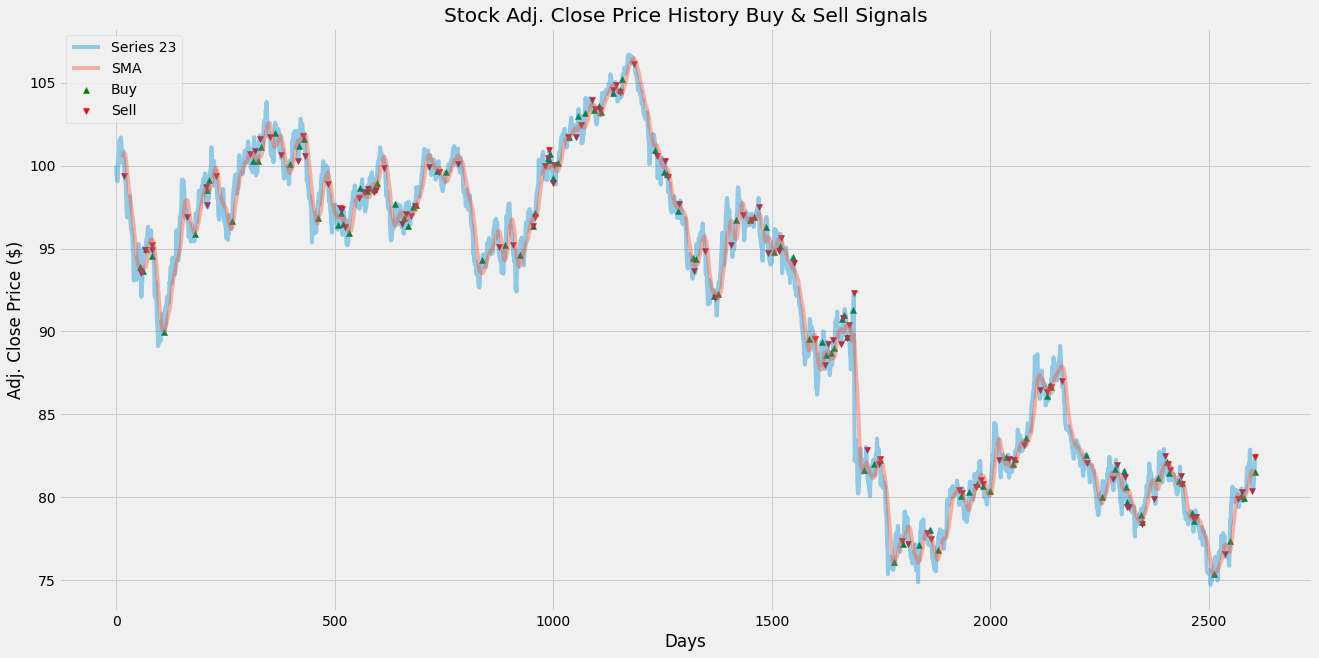

In [39]:
window_test =15
series = 'Series 23'
# =========================================

#Store the buy and sell data into a variable
buy_sell_data_test = rolling_averages_inflexions(df[series], window_test)

# visualise test
plt.figure(figsize=(20, 10))
plt.plot(df[series], label=series, alpha=0.4)
plt.plot(df[series].rolling(window=window_test).mean(), label='SMA', alpha=0.4)
plt.scatter(df.index, buy_sell_data_test[0], label='Buy', marker='^', color='green')
plt.scatter(df.index, buy_sell_data_test[1], label='Sell', marker='v', color='red')
plt.title('Stock Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [22]:
def Backtest(data, buy_sell):
    
    profit = np.nansum(buy_sell[1]) - np.nansum(buy_sell[0])
    data_profit = data.iloc[-1] - data[0]
    rel_profit = profit - data_profit
    
    return rel_profit


In [26]:
def Backtest_2(data, buy_sell_data):
    
    profit = 0
    
    for i in range(1,len(buy_sell_data[2])): 

        if buy_sell_data[2][i]==buy_sell_data[2][i-1]:
            #no change
            pass

        elif buy_sell_data[2][i] == 1 and buy_sell_data[2][i-1]==-1:
            #from nothing to long
            price_bought_at = data[i]
            
        
        elif buy_sell_data[2][i] == 0 and buy_sell_data[2][i-1]==-1:
            #from nothing to short
            price_shorted_at = data[i]
            

        elif buy_sell_data[2][i] == 0 and buy_sell_data[2][i-1]==1:
            #from long to short
            profit += df[series][i] - price_bought_at
            price_shorted_at = data[i]

        elif buy_sell_data[2][i] == 1 and buy_sell_data[2][i-1]==0:
            #from short to long
            profit += price_shorted_at - df[series][i]  
            price_bought_at = data[i]   

        elif buy_sell_data[2][i] == -1 and buy_sell_data[2][i-1]==0:
            #from short to nothing
            profit += price_shorted_at - df[series][i]   
            
        elif buy_sell_data[2][i] == -1 and buy_sell_data[2][i-1]==1:
            #from long to nothing
            profit += df[series][i]  - price_bought_at
            
    return profit  

In [32]:
def profit_fct_inflection_points():
    
    """
    parameters that can be modified 
    """
    
    assets = list(df.columns)
    window = 30
    profit = {}
    
    for i in assets:
        profit_on_series = Backtest_2(df[i], rolling_averages_inflexions(df[i], window))
        profit[i]=profit_on_series

    return profit

In [33]:
profit_inflexion = profit_fct_inflection_points()
profit_inflexion

{'Series 1': 440.39420436625693,
 'Series 2': 723.1021052872904,
 'Series 3': 14.56265839356233,
 'Series 4': 184.77156527816993,
 'Series 5': -93.90248854288734,
 'Series 6': 64.06230472151098,
 'Series 7': -41.77683474299158,
 'Series 8': -263.780218489321,
 'Series 9': 227.60086669029658,
 'Series 10': -16.92140509719293,
 'Series 11': -26.508980502730736,
 'Series 12': 134.37437212250308,
 'Series 13': 2916.530765670033,
 'Series 14': 602.4768830634312,
 'Series 15': 28.986607862827555,
 'Series 16': 85.83531491708224,
 'Series 17': -47.94313553371016,
 'Series 18': -40.490558007026024,
 'Series 19': -62.27272767053594,
 'Series 20': 36.15572574216091,
 'Series 21': 19.616394282018774,
 'Series 22': -16.49376798081471,
 'Series 23': -12.540374389892463,
 'Series 24': -10.64094249891977,
 'Series 25': 54.67817623748843,
 'Series 26': 25.88561854209628,
 'Series 27': 11.145352857376523,
 'Series 28': -609.6410680584356,
 'Series 29': 41.50460974390888}